In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

*Load Data*

In [63]:
file_path = "flight_data.csv"
df = pd.read_csv(file_path)
print("Data shape: ", df.shape)
df.head()

Data shape:  (11478, 19)


,Unnamed: 0,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,geo_altitude,on_ground,velocity,true_track,vertical_rate,sensors,barometric_altitude,transponder_code,special_purpose_indicator,position_source,category
0,0,a808c5,CTF617,United States,1.759326e+09,1759326197,-70.7567,42.4879,579.12,False,99.36,211.88,0.00,NaN,533.40,7403.0,False,0,0
1,1,39de4f,TVF14LQ,France,1.759326e+09,1759326197,6.0246,48.3662,10347.96,False,225.21,112.99,0.00,NaN,10058.40,1000.0,False,0,0
2,2,39de4e,TVF76MJ,France,1.759326e+09,1759326197,4.3776,45.5893,11338.56,False,197.59,347.52,0.33,NaN,10972.80,1000.0,False,0,0
3,3,a89ea5,N6545H,United States,1.759326e+09,1759326197,-102.5612,32.1829,1143.00,False,57.62,37.38,-0.65,NaN,1127.76,NaN,False,0,0
4,4,4b1815,SWR8LG,Switzerland,1.759326e+09,1759326194,8.5653,47.4460,NaN,True,4.89,196.88,NaN,NaN,NaN,3015.0,False,0,0


*Inspect data*

In [64]:
print(df.columns)
print(df.info())
print(df.describe())

Index(['Unnamed: 0', 'icao24', 'callsign', 'origin_country', 'time_position',
       'last_contact', 'longitude', 'latitude', 'geo_altitude', 'on_ground',
       'velocity', 'true_track', 'vertical_rate', 'sensors',
       'barometric_altitude', 'transponder_code', 'special_purpose_indicator',
       'position_source', 'category'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11478 entries, 0 to 11477
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 11478 non-null  int64  
 1   icao24                     11478 non-null  object 
 2   callsign                   11255 non-null  object 
 3   origin_country             11478 non-null  object 
 4   time_position              11376 non-null  float64
 5   last_contact               11478 non-null  int64  
 6   longitude                  11376 non-null  float64
 7   latitude                  

*Data Cleaning*

In [65]:
df = df.drop("sensors", axis=1)
df = df.drop_duplicates()
print(df.shape)

(11478, 18)


*Convert UNIX time to datetime*

In [66]:
for col in ["time_position","last_contact"]:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], unit='s', errors="coerce")
print(df.head())

   Unnamed: 0  icao24  callsign origin_country       time_position  \
0           0  a808c5  CTF617    United States 2025-10-01 13:43:17   
1           1  39de4f  TVF14LQ          France 2025-10-01 13:43:17   
2           2  39de4e  TVF76MJ          France 2025-10-01 13:43:17   
3           3  a89ea5  N6545H    United States 2025-10-01 13:43:16   
4           4  4b1815  SWR8LG      Switzerland 2025-10-01 13:43:14   

         last_contact  longitude  latitude  geo_altitude  on_ground  velocity  \
0 2025-10-01 13:43:17   -70.7567   42.4879        579.12      False     99.36   
1 2025-10-01 13:43:17     6.0246   48.3662      10347.96      False    225.21   
2 2025-10-01 13:43:17     4.3776   45.5893      11338.56      False    197.59   
3 2025-10-01 13:43:17  -102.5612   32.1829       1143.00      False     57.62   
4 2025-10-01 13:43:14     8.5653   47.4460           NaN       True      4.89   

   true_track  vertical_rate  barometric_altitude  transponder_code  \
0      211.88        

*Handle missing values*

In [67]:
print(df.isna().sum())
df = df.dropna(subset=["longitude", "latitude"])

Unnamed: 0                      0
icao24                          0
callsign                      223
origin_country                  0
time_position                 102
last_contact                    0
longitude                     102
latitude                      102
geo_altitude                  994
on_ground                       0
velocity                        2
true_track                      0
vertical_rate                 840
barometric_altitude           899
transponder_code             5352
special_purpose_indicator       0
position_source                 0
category                        0
dtype: int64


**EXPLORATORY ANALYSIS**

*Set Graph Styles*

In [68]:
pd.set_option("display.max_columns", None)
sns.set_style("darkgrid")  # adds seaborn style to charts, eg. grid
plt.style.use("dark_background")  # inverts colors to dark theme
sns.set_palette("colorblind")
# sns.reset_defaults()

*Flights per country*

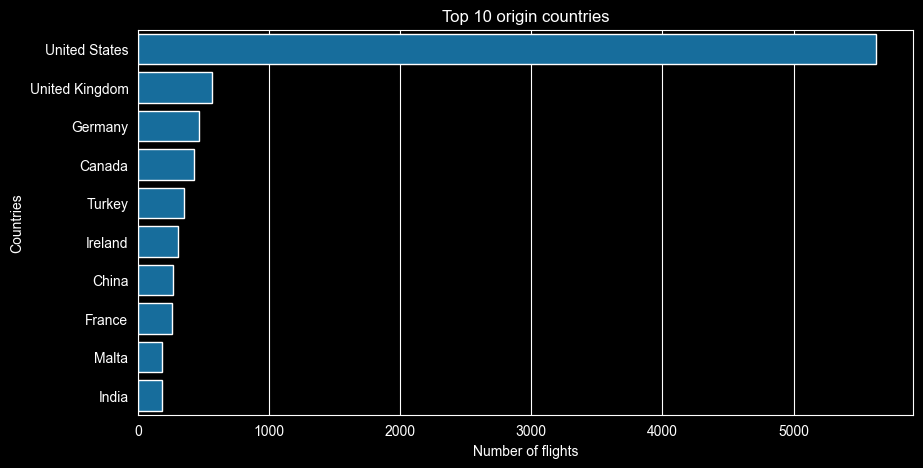

In [69]:
if "origin_country" in df.columns:
    top_country_count = (df["origin_country"].value_counts().head(10))
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_country_count.values, y=top_country_count.index)
    plt.title("Top 10 origin countries")
    plt.xlabel("Number of flights")
    plt.ylabel("Countries")
    plt.show()    

*Distribution of Altitude*

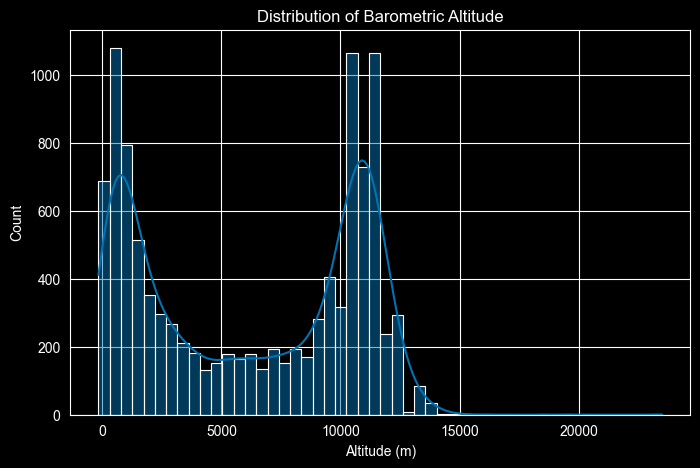

In [70]:
if "barometric_altitude" in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df["barometric_altitude"].dropna(), bins=50, kde=True)
    plt.title("Distribution of Barometric Altitude")
    plt.xlabel("Altitude (m)")
    plt.show()

*Distribution of Flight Velocity*

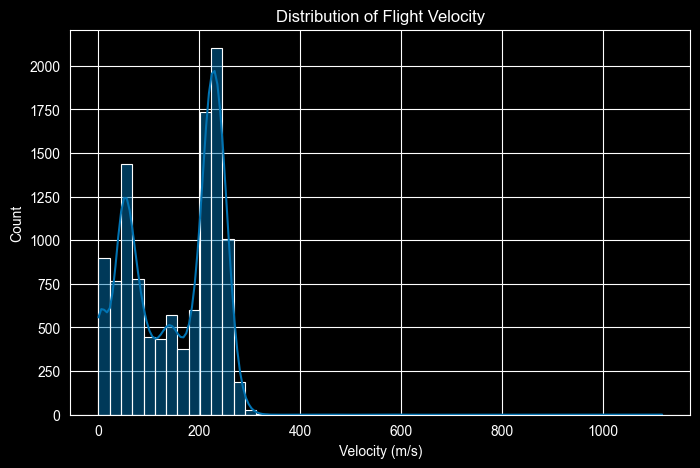

In [71]:
if "velocity" in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df["velocity"].dropna(), bins=50, kde=True)
    plt.title("Distribution of Flight Velocity")
    plt.xlabel("Velocity (m/s)")
    plt.show()

*Flights over time*

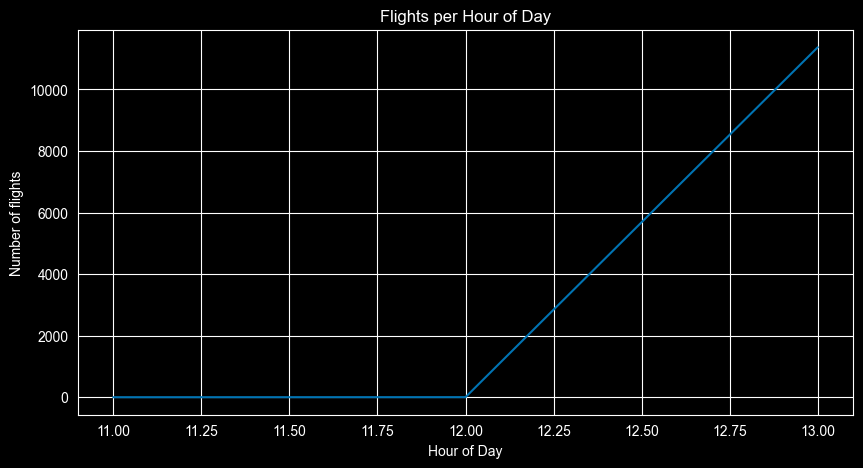

In [72]:
if "time_position" in df.columns:
    df["hour"] = df["time_position"].dt.hour
    hourly_counts = df.groupby("hour")["icao24"].count()
    plt.figure(figsize=(10,5))
    sns.lineplot(x=hourly_counts.index, y=hourly_counts.values)
    plt.title("Flights per Hour of Day")
    plt.xlabel("Hour of Day")
    plt.ylabel("Number of flights")
    plt.show()

*Spatial Analysis*

In [73]:
mean_lat, mean_lon = df["latitude"].mean(), df["longitude"].mean()
flight_map = folium.Map(location=[mean_lat, mean_lon], zoom_start=3)

for _, row in df.sample(min(1000, len(df))).iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=2,
        color="blue",
        fill=True,
        fill_opacity=0.5
    ).add_to(flight_map)
    
flight_map.save("flight_map.html")
print("Map saved")

Map saved


*Per-Aircraft Analysis*

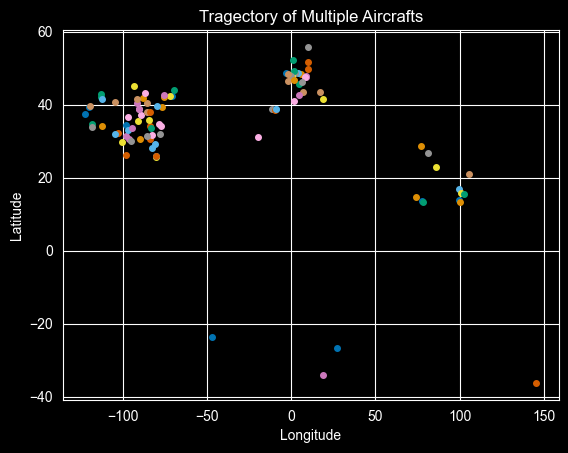

In [74]:

icao_examples = df["icao24"].iloc[:100].unique()  # select 5 unique aircraft for example

for icao in icao_examples:
    flight_path = df[df["icao24"] == icao].sort_values("time_position")
    plt.plot(flight_path["longitude"], flight_path["latitude"], marker="o", markersize=4)

plt.title("Tragectory of Multiple Aircrafts")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

*Correlation Analysis*

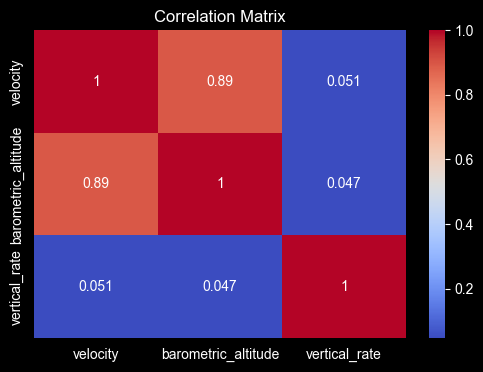

In [75]:
selected_cols = ["velocity", "barometric_altitude", "vertical_rate"]
plt.figure(figsize=(6,4))
sns.heatmap(df[selected_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

*Save Processed Data in CSV*

In [76]:
df.to_csv("cleaned_flight_data.csv", index=False)
print("Cleaned Data saved as .csv")

Cleaned Data saved as .csv
